<a href="https://colab.research.google.com/github/siddharth-69/hello-world/blob/master/Algebra_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# User Distribution

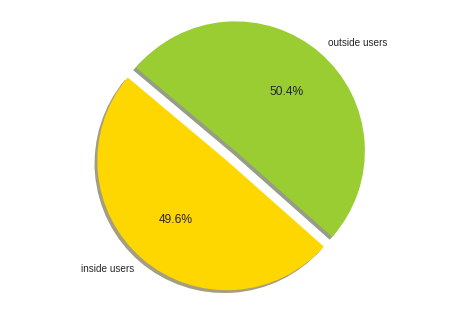

In [0]:
import matplotlib.pyplot as plt


# Data to plot
labels = ['inside users', 'outside users']
sizes = [16130,16411]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [0]:
#code used to get the above results
c=0
for i in range(1422906):
    if df['user_ids'][i][5]=='o':
        c+=1
        
c1=0
for i in range(1422906):
    if df['user_ids'][i][5]!='o':
        c1+=1

# Usage Distributon

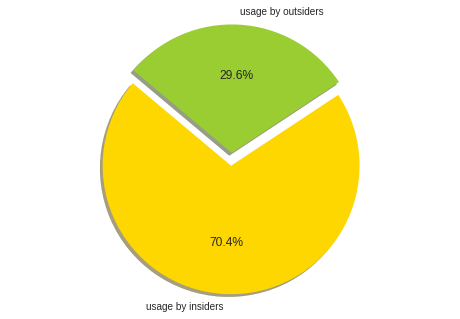

In [0]:
import matplotlib.pyplot as plt


# Data to plot
labels = ['usage by insiders', 'usage by outsiders']
sizes = [1422906-421056,421056]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [0]:
#code used to get the above results

x=[]
x1=0

for i in range(1422906):
    if df['user_ids'][i][5]=='o':
        x1=int(df['user_ids'][i][9:])
    if x1 not in x:
        x.append(x1)
        
print(len(x))

# Incoming to outgoing ratio

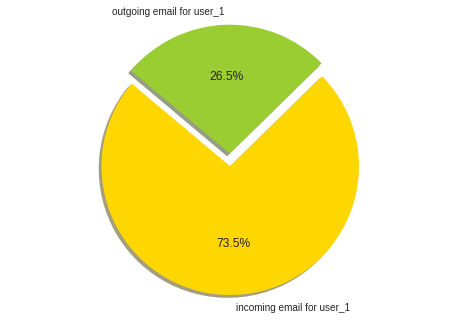

In [0]:
import matplotlib.pyplot as plt
# Data to plot
labels = ['incoming email for user_1', 'outgoing email for user_1']
sizes = [6196,2239]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Active users

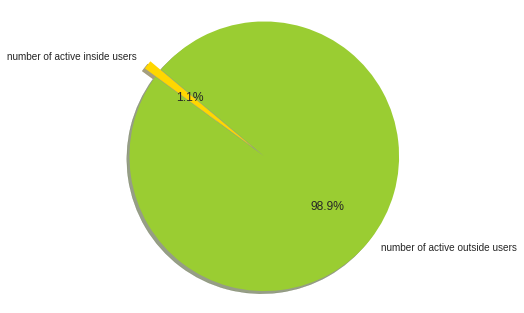

In [0]:
import matplotlib.pyplot as plt


# Data to plot
labels = ['number of active inside users', 'number of active outside users']
sizes = [174,16239]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Conclusions

1.Although there are more number of outside users, the Overall usage is more among the inside users.

2.Only very few accounts of insiders are being actively used.

3.Not all Emails are answered by the users.E.g-: user_1 only answers 35%  of the incomin Emails.

# Apply K-nearest neighbours(K=5) to predict response time

In [7]:
import pandas as pd
import numpy as np
df=pd.read_csv("drive/employee_email_data_v2.csv")


for i in range(50229):
    r=int(df['event_time'][i][2:4]+df['event_time'][i][5:7]+df['event_time'][i][8:10]+df['event_time'][i][11:13])
    df['event_time'][i]=r

'''
r=df.sort_values(['','a'],ascending=[1,0])
r=r.reset_index(drop=True)
'''

"\nr=df.sort_values(['','a'],ascending=[1,0])\nr=r.reset_index(drop=True)\n"

In [0]:
r=df.sort_values(['event_time','tag','user_ids','event_id'],ascending=[1,0,0,0])
r=r.reset_index(drop=True)

In [12]:
print(r[0:50229])

                   event_id event_time   tag       user_ids
0      gse:1600513e70f0ada6   17112900    to   user_out_141
1      gse:160053cab6ea93f6   17112900    to        user_79
2      gse:160053caa5bb7320   17112900    to        user_79
3      gse:160051ea113c3b6c   17112900    to        user_59
4      gse:160053693413a623   17112900    to        user_55
5      gse:1600518379341b84   17112900    to         user_5
6      gse:1600549c2eea5132   17112900    to        user_39
7      gse:160051c77e1a4c43   17112900    to        user_39
8      gse:160051c6ff2c1c24   17112900    to        user_39
9      gse:160052272255baa5   17112900    to       user_381
10     gse:160051eaa2e44b52   17112900    to        user_20
11     gse:160051e9462078b8   17112900    to         user_2
12     gse:160052bfa63d90c3   17112900    to        user_17
13     gse:160051ebecf902fe   17112900    to       user_158
14     gse:1600521a93f9808c   17112900    to        user_15
15     gse:160051a1b979ffbe   17112900  

In [0]:
z2={}
for i in range(50229):
    if r['tag'][i]=='from':
        if r['user_ids'][i] not in z2:
            z2[r['user_ids'][i]]=[r['event_time'][i]]
        else:
            z2[r['user_ids'][i]].append(r['event_time'][i])

In [0]:
z3={}
for i in range(50229):
    if r['tag'][i]=='to':
        if r['user_ids'][i] not in z3:
            z3[r['user_ids'][i]]=[r['event_time'][i]]
        else:
            z3[r['user_ids'][i]].append(r['event_time'][i])

In [0]:
import numpy as np

In [0]:
f={}
x_=[]
y_=[]

for i in z3:
  if i in z2:
    x9=min(len(z3[i]),len(z2[i]))
    op=sorted(np.abs(np.array(z3[i][0:x9])-np.array(z2[i][0:x9])))
    op=np.mean(op[0:3])
    if op<100:
      x_.append(i)
      y_.append(op)
      f[i]=op                                #removing_the_outliers
    
    


In [0]:
import matplotlib.pyplot as plt

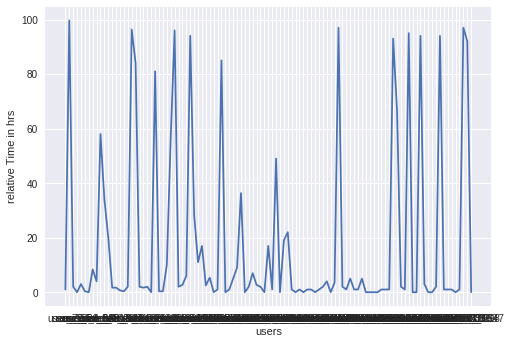

In [62]:
plt.plot(x_,y_)
plt.ylabel('relative Time in hrs')
plt.xlabel('users')
plt.show()

# Names of user and predicted response time(in hrs)

In [63]:
print(f)

{'user_79': 1.0, 'user_59': 99.66666666666667, 'user_55': 2.0, 'user_5': 0.0, 'user_20': 3.0, 'user_1': 0.3333333333333333, 'user_out_548': 0.0, 'user_9': 8.333333333333334, 'user_65': 4.0, 'user_4': 58.0, 'user_121': 34.0, 'user_102': 20.0, 'user_out_943': 1.6666666666666667, 'user_26': 1.6666666666666667, 'user_16': 0.6666666666666666, 'user_116': 0.3333333333333333, 'user_7': 2.0, 'user_64': 96.33333333333333, 'user_10': 84.0, 'user_93': 2.0, 'user_37': 1.6666666666666667, 'user_24': 2.0, 'user_169': 0.0, 'user_120': 81.0, 'user_out_69': 0.3333333333333333, 'user_6': 0.3333333333333333, 'user_262': 10.0, 'user_111': 56.666666666666664, 'user_out_3916': 96.0, 'user_out_3864': 2.0, 'user_54': 2.6666666666666665, 'user_out_3869': 6.0, 'user_out_1697': 94.0, 'user_out_428': 28.333333333333332, 'user_88': 11.0, 'user_1542': 17.0, 'user_out_2408': 2.5, 'user_325': 5.333333333333333, 'user_out_3986': 0.0, 'user_out_1221': 1.0, 'user_out_2279': 85.0, 'user_out_1476': 0.0, 'user_out_214': 1.